In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_now(title, ax, T, prec, ylim_min, ylim_max):
    ax.plot(T, prec[0], 'o-', label='8 bits')
    ax.plot(T, prec[1], 's-', label='16 bits')
    ax.plot(T, prec[2], 'p-', label='32 bits')
    ax.plot(T, prec[3], 'h-', label='64 bits')
    ax.plot(T, prec[4], 'd-', label='128 bits')
    ax.set_xticks(T)
    ax.set_xlabel('Number of samples')
    ax.set_ylim(ylim_min, ylim_max)
    ax.set_ylabel('Prec@100')
    ax.title.set_text(title)
    ax.grid()

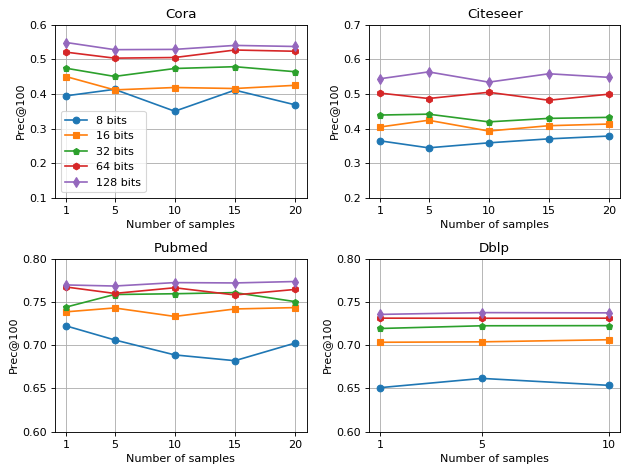

In [3]:
fig = plt.figure(figsize=(8, 6), dpi=80)

# cora
T = [1, 5, 10, 15, 20]
prec = [[0.3946, 0.4498, 0.4740, 0.5205, 0.5484],
        [0.4132, 0.4116, 0.4505, 0.5033, 0.5278],
        [0.3500, 0.4185, 0.4734, 0.5051, 0.5286],
        [0.4109, 0.4156, 0.4786, 0.5268, 0.5401],
        [0.3685, 0.4248, 0.4641, 0.5232, 0.5370]]
T = np.array(T)
prec = np.array(prec).T

ax1 = plt.subplot(221)
plot_now("Cora", ax1, T, prec, 0.1, 0.6)
ax1.legend()

# citeseer
prec = [[0.3643, 00.4046, 0.4390, 0.5023, 0.5439],
        [0.3443, 0.4239, 0.4415, 0.4867, 0.5636],
        [0.3587, 0.3928, 0.4193, 0.5047, 0.5340],
        [0.3702, 0.4082, 0.4293, 0.4817, 0.5582],
        [0.3783, 0.4130, 0.4323, 0.4993, 0.5478]]
prec = np.array(prec).T

ax1 = plt.subplot(222)
plot_now("Citeseer", ax1, T, prec, 0.2, 0.7)

# pubmed
df = pd.read_csv('logs/T_experiment.pubmed.txt', sep='\t', header=None, 
                 names=['dataset', 'bits', 'samples', 'Prec'])
prec = [list(df[df.samples==s].Prec) for s in T]
prec = np.array(prec).T

ax1 = plt.subplot(223)
plot_now("Pubmed", ax1, T, prec, 0.6, 0.8)

# dblp
df = pd.read_csv('logs/T_experiment.dblp.txt', sep='\t', header=None, 
                 names=['dataset', 'bits', 'samples', 'Prec'])
prec = [list(df[df.samples==s].Prec) for s in T[:3]]
prec = np.array(prec).T

ax1 = plt.subplot(224)
plot_now("Dblp", ax1, T[:3], prec, 0.6, 0.8)

plt.tight_layout()


In [4]:
fig.savefig("T_experiment.pdf", bbox_inches='tight')